# Project Title: Wine Quality Prediction

# Description:

This project aims to predict the quality of wine based on its chemical characteristics. Using real-world data from viticulture, the dataset includes chemical attributes such as acidity, density, sugar content, and alcohol levels, which serve as features for building predictive models. By analyzing these features, we can classify wines into quality categories, providing valuable insights for winemakers and consumers.

# Dataset:

Contains chemical properties of wine samples along with corresponding quality ratings. Features include:

Fixed acidity

Volatile acidity

Citric acid

Residual sugar

Chlorides

Free sulfur dioxide

Total sulfur dioxide

Density

pH

Sulphates

Alcohol

Quality (target variable)

# Key Concepts and Challenges:

Classifier Models:

Random Forest: Handles feature importance and reduces overfitting.

Stochastic Gradient Descent (SGD): Efficient for large datasets and linear models.

Support Vector Classifier (SVC): Useful for complex decision boundaries.

Chemical Qualities Analysis:

Understanding how factors like acidity, sugar, and alcohol content affect wine quality.

Feature scaling may be needed for some classifiers (e.g., SVC).

Data Analysis Libraries:

Pandas: For data manipulation and cleaning.

NumPy: For efficient numerical computations.

Data Visualization:

Seaborn & Matplotlib: For exploring patterns, distributions, and correlations in the dataset.

Helps identify which features are most predictive of quality.

Challenges:

Imbalanced target classes (some quality ratings occur more frequently than others).

Selecting the most relevant features to improve model performance.

Tuning hyperparameters for each classifier to optimize accuracy.

# Data Loading/ Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv(r'C:\Users\shadrach\Downloads\Wine.csv') 




In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
print(data.head())
print(data.info())
print(data.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

# Data Cleaning

In [5]:

print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [6]:
print(data.duplicated().sum())

0


In [7]:
print(data.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object


In [51]:
##Remove Non-Informative Feature
X = X.drop(columns=['Id'])



KeyError: "['Id'] not found in axis"

# Exploratory data analysis

# Univariate Analysis
Numerical Features

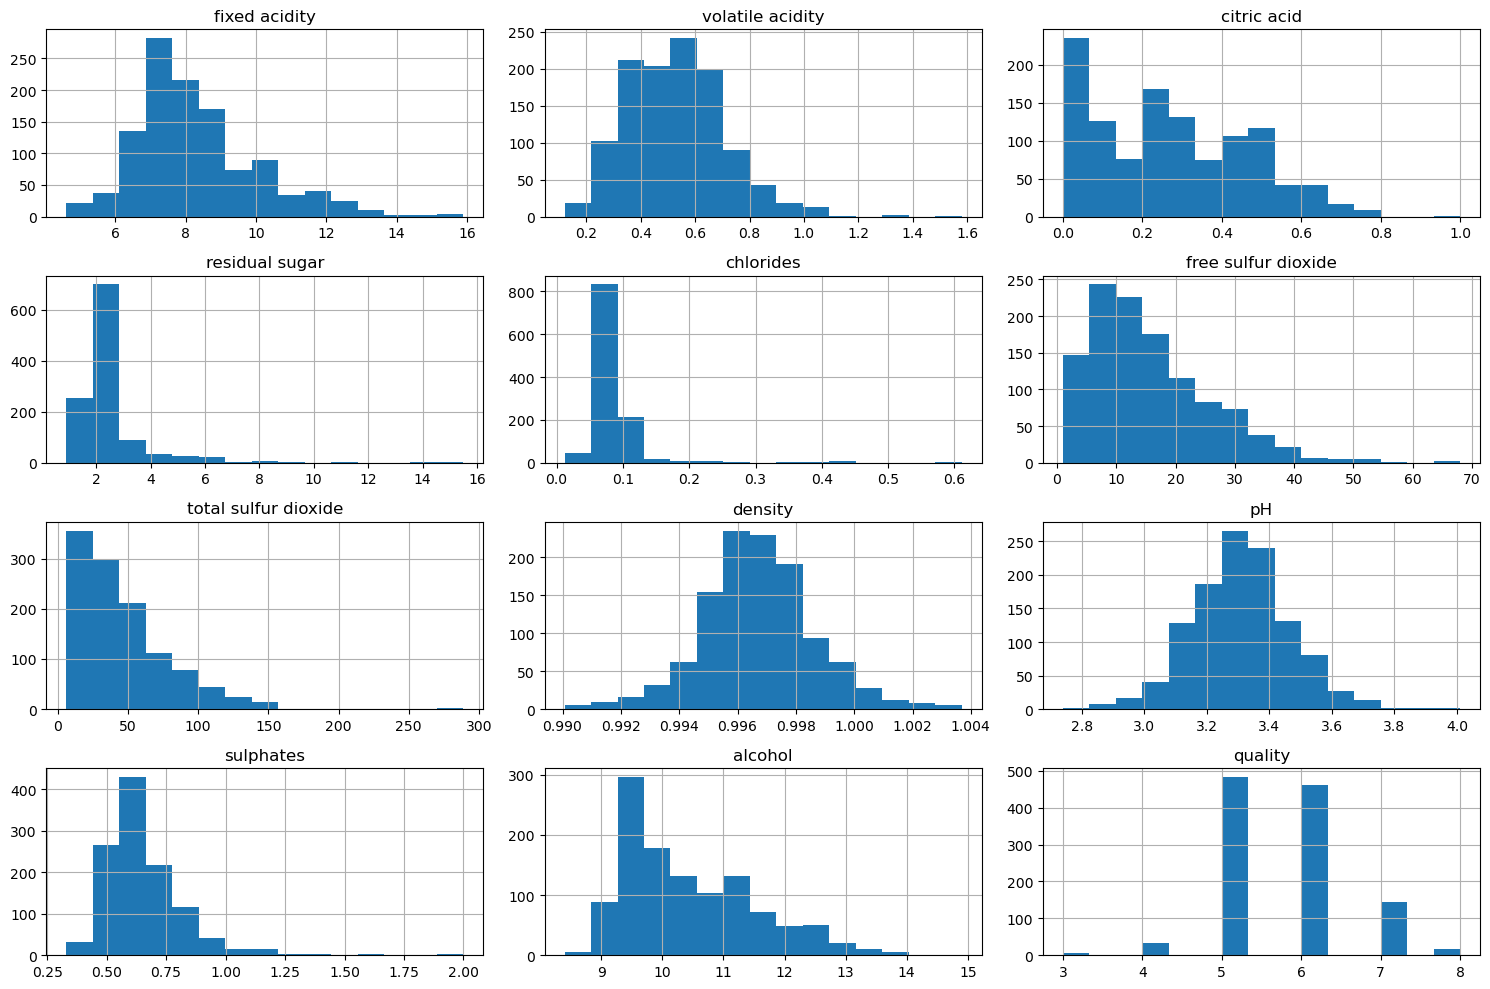

In [8]:
numerical_features = data.columns[:-1]  # exclude 'quality' or 'quality_label'

data[numerical_features].hist(bins=15, figsize=(15,10))
plt.tight_layout()
plt.show()


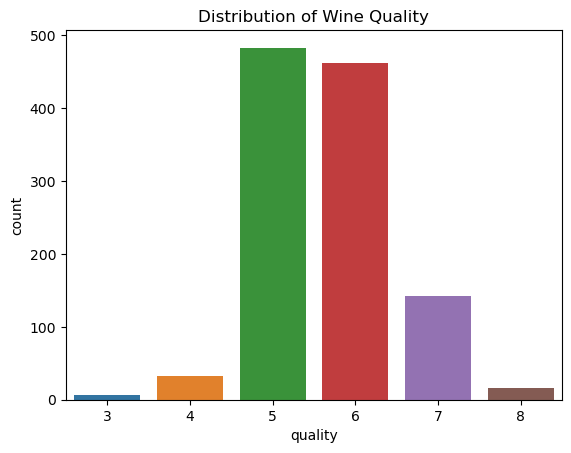

In [9]:
sns.countplot(x='quality', data=data)
plt.title("Distribution of Wine Quality")
plt.show()


In [10]:
##Multivarient Analysis

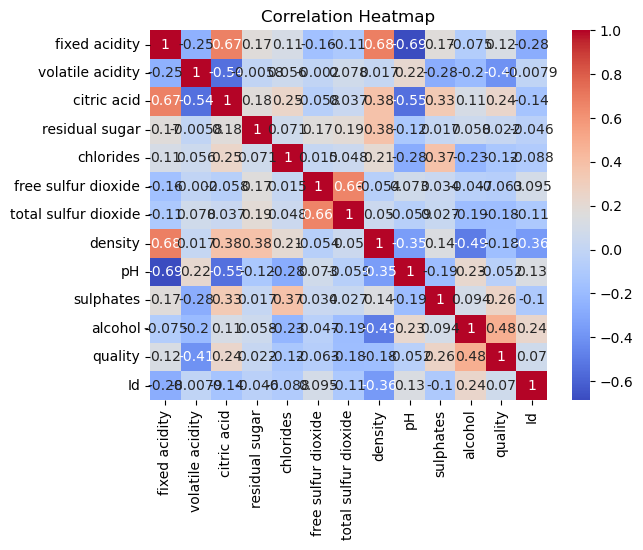

In [11]:

sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

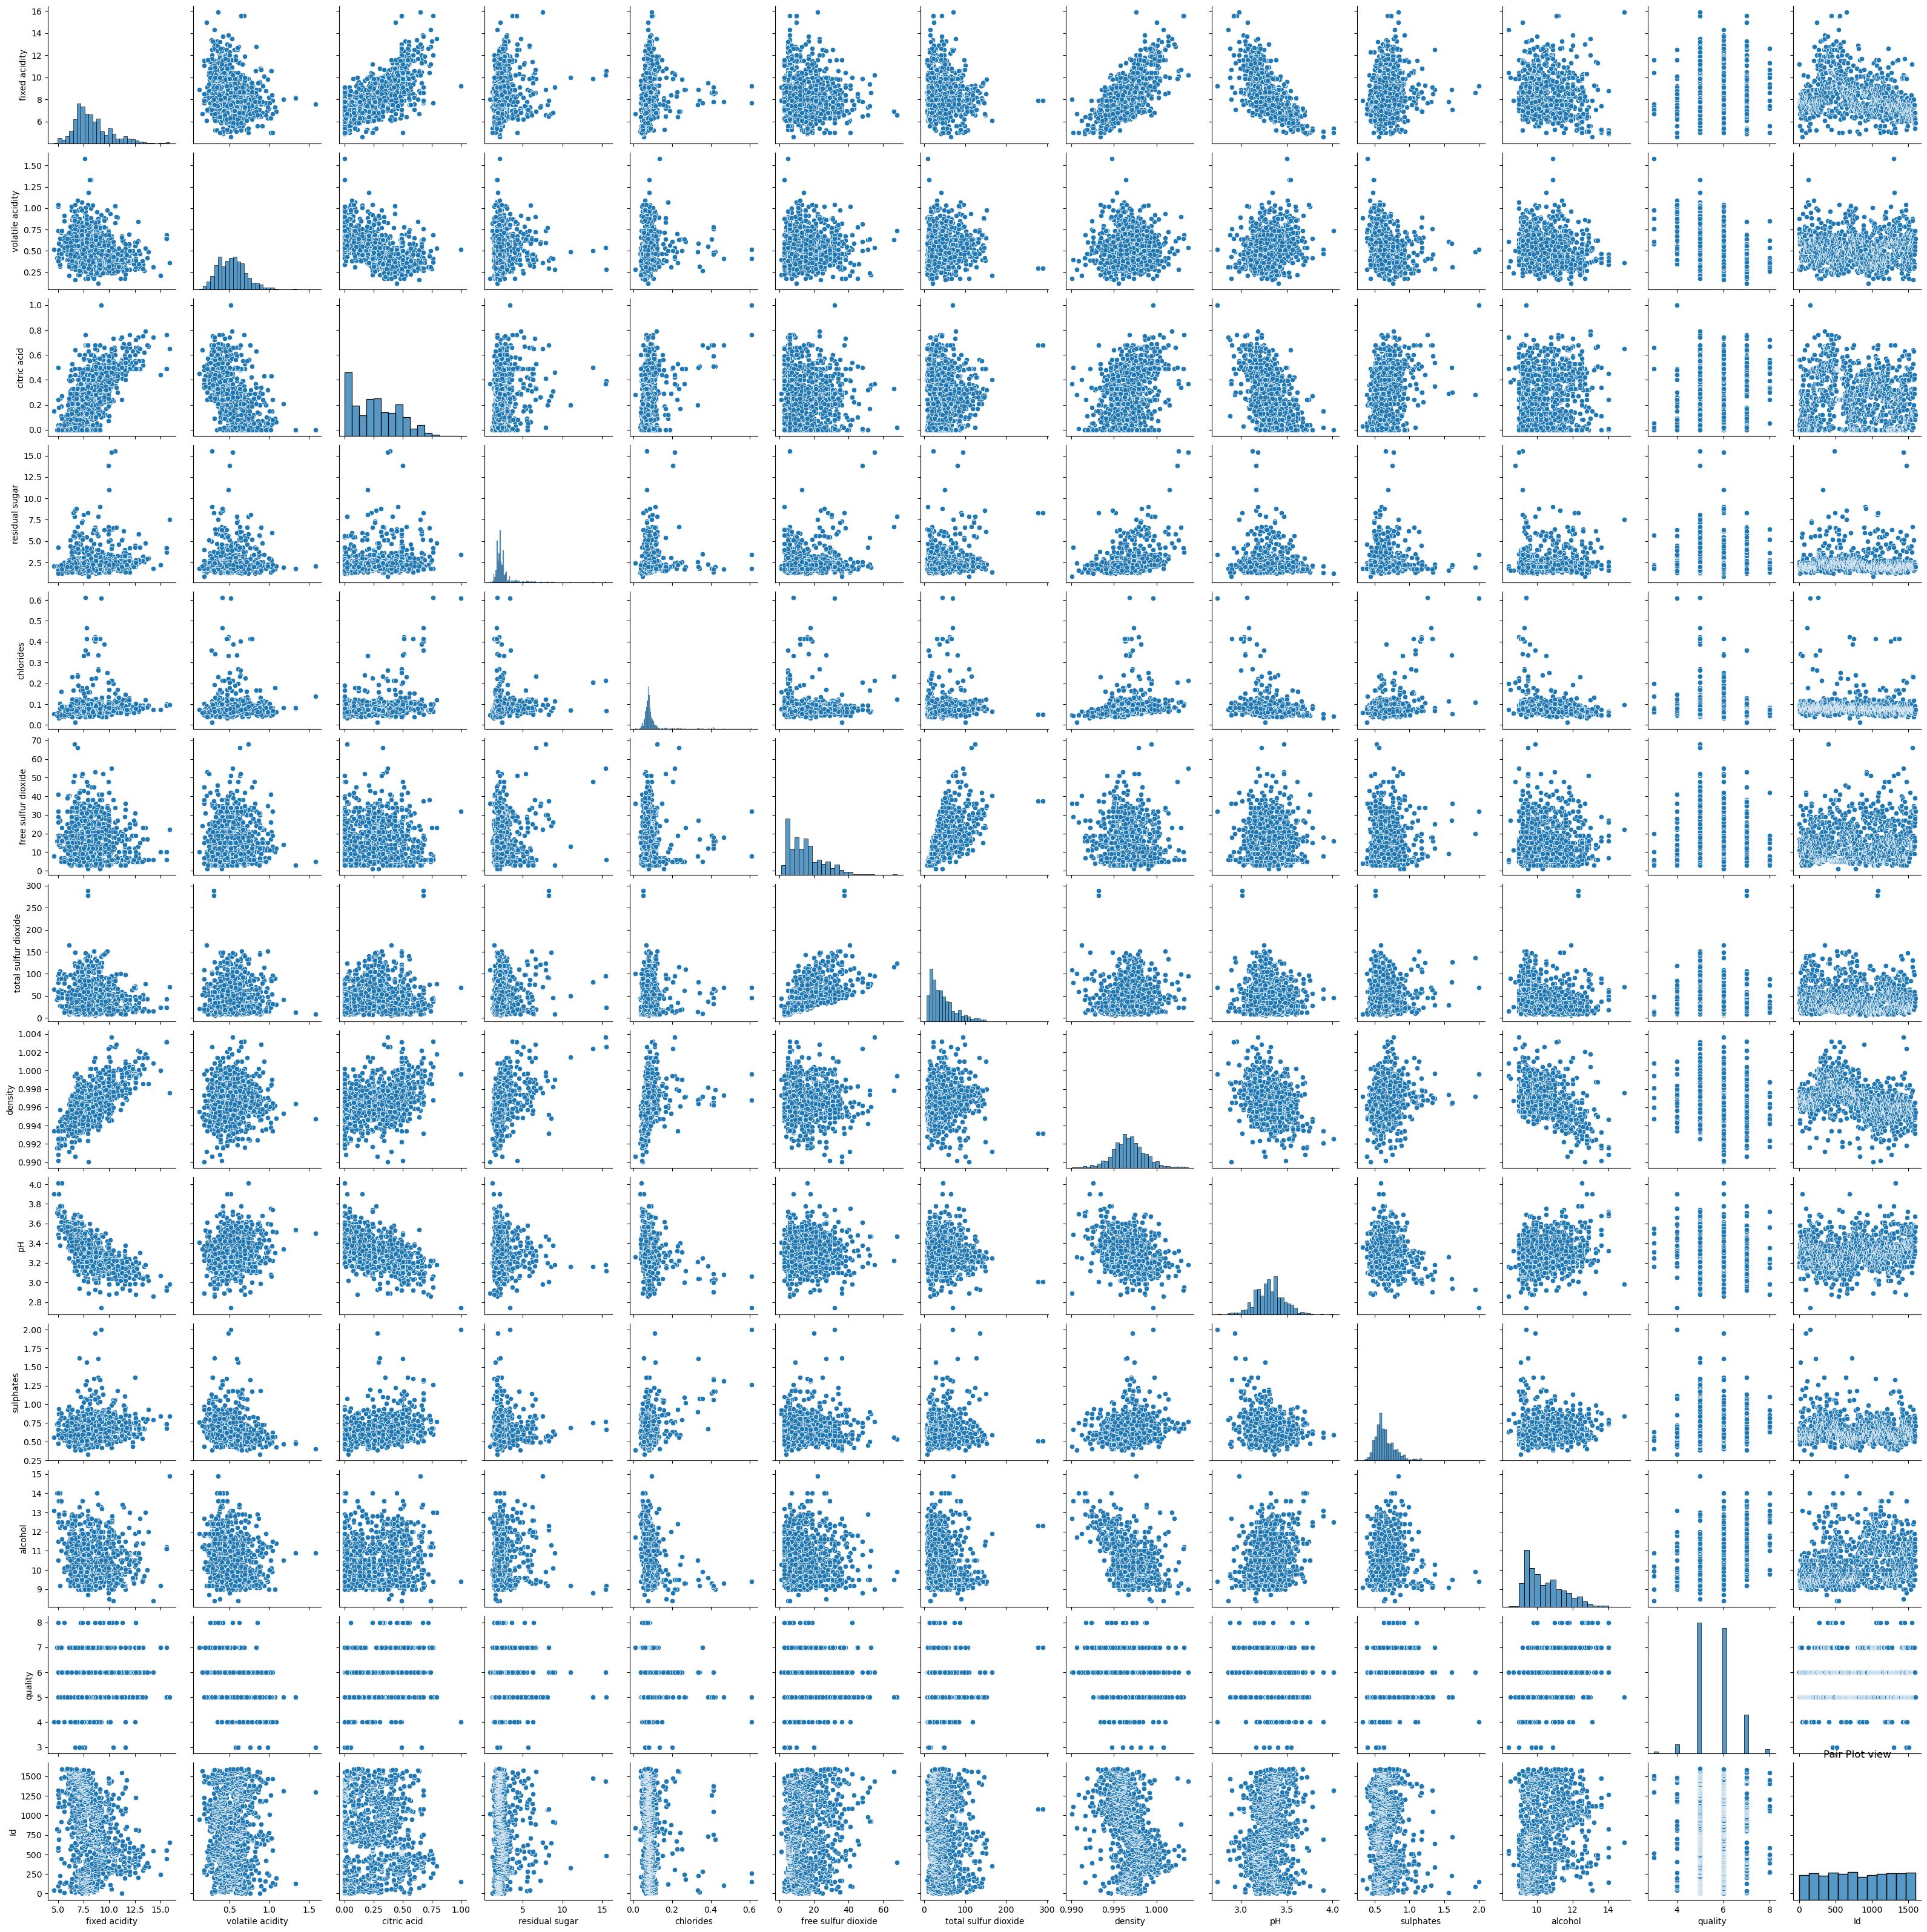

In [12]:
##Multivarient analysis
sns.pairplot(data)
plt.title('Pair Plot view')
plt.show()

In [13]:
##Data preprossesing

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate Features and Target
X = data.drop('quality', axis=1)  
y = data['quality']              




In [53]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [54]:
# 3. Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling Complete!")


Feature Scaling Complete!


# Data modelling

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Random Forest Classifier

Random Forest Accuracy: 0.7030567685589519
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.85      0.78        97
           6       0.68      0.70      0.69        92
           7       0.71      0.52      0.60        29
           8       0.00      0.00      0.00         3

    accuracy                           0.70       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.67      0.70      0.68       229



C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


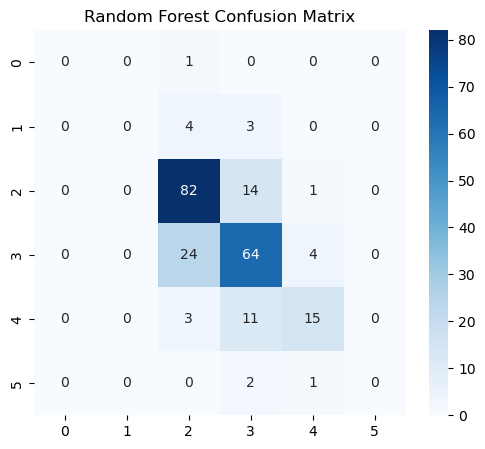

In [18]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Stochastic Gradient Descent (SGD)

SGD Accuracy: 0.5676855895196506
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.71      0.69        97
           6       0.58      0.45      0.50        92
           7       0.37      0.69      0.48        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.27      0.31      0.28       229
weighted avg       0.56      0.57      0.56       229



C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


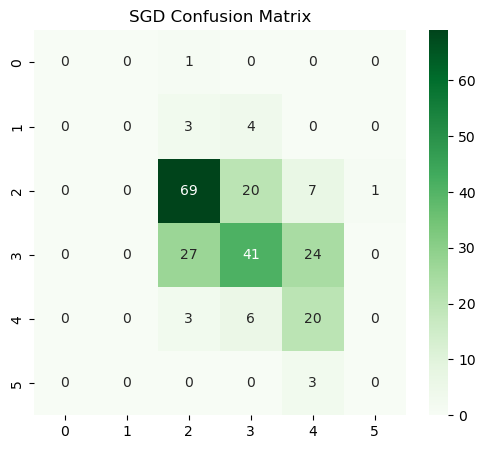

In [19]:

sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)  # Use scaled features

y_pred_sgd = sgd.predict(X_test_scaled)


print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd), annot=True, fmt='d', cmap='Greens')
plt.title("SGD Confusion Matrix")
plt.show()


# Support Vector Classifier (SVC)

SVC Accuracy: 0.6724890829694323
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.82      0.76        97
           6       0.63      0.70      0.66        92
           7       0.71      0.34      0.47        29
           8       0.00      0.00      0.00         3

    accuracy                           0.67       229
   macro avg       0.34      0.31      0.31       229
weighted avg       0.64      0.67      0.65       229



C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shadrach\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


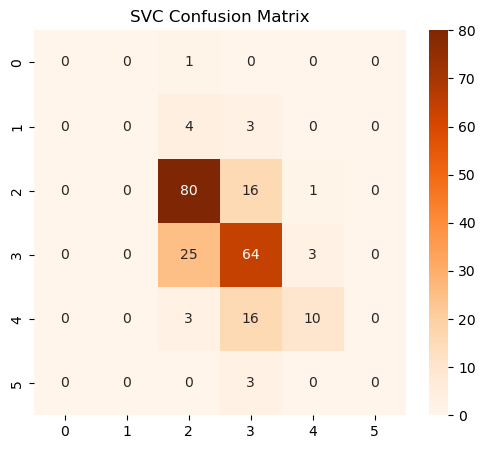

In [20]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_scaled, y_train)  

y_pred_svc = svc.predict(X_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Oranges')
plt.title("SVC Confusion Matrix")
plt.show()


Model Evaluation & Interpretation
1. Accuracy Overview
Model	Accuracy
Random Forest	0.70
SGD	0.57
SVC	0.67

Random Forest performs best overall, with ~70% accuracy.

SGD performs worst (~57%), likely because it struggles with imbalanced and multi-class data.

SVC is close to Random Forest but slightly lower (~67%).

# Improving Model Performance

In [21]:
###Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best Parameters:", grid_rf.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [22]:
###Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", scores.mean())


Random Forest CV Accuracy: 0.5372060062820807


This is relatively low — only ~54%.
The model’s performance varies across folds (not stable),Possibly due to class imbalance or overfitting on dominant classes (5 and 6).

So, we’ll need to address class imbalance next.

In [23]:
importances = rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)


                 Feature  Importance
10               alcohol    0.138430
9              sulphates    0.112368
1       volatile acidity    0.100424
6   total sulfur dioxide    0.085147
11                    Id    0.081769
7                density    0.077246
4              chlorides    0.074958
0          fixed acidity    0.073270
8                     pH    0.070528
2            citric acid    0.066347
3         residual sugar    0.060582
5    free sulfur dioxide    0.058931


In [43]:
##Remove Non-Informative Feature
X = X.drop(columns=['Id'])


KeyError: "['Id'] not found in axis"

In [25]:
import sklearn, imblearn
print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.4.2
imbalanced-learn version: 0.12.3


In [57]:
##Handle Class Imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)



In [58]:
###Retrain Random Forest with Best Params
rf_final = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=5,
    random_state=42
)
rf_final.fit(X_resampled, y_resampled)


RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [59]:
y_pred_final = rf_final.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


Final Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00        92
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00         3

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



# Feature Importance Visualization

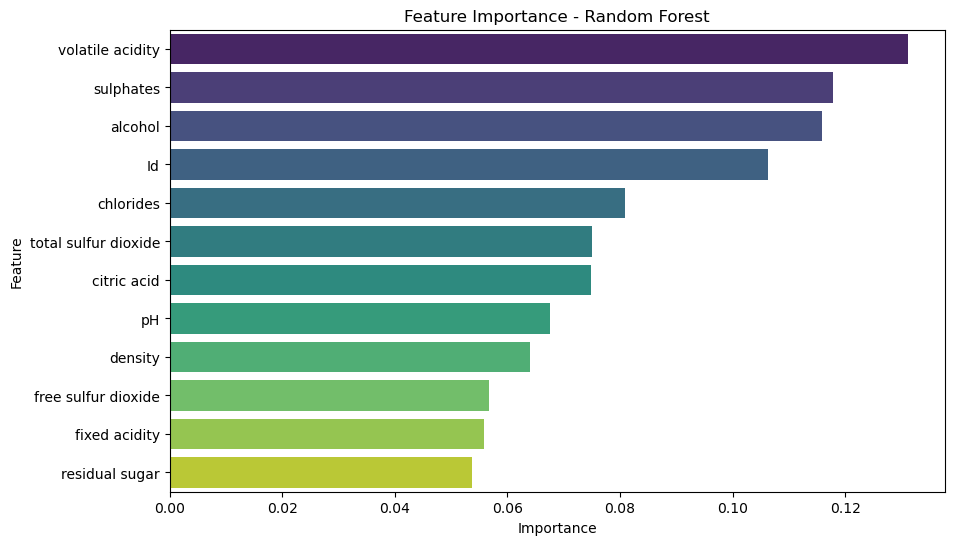

In [60]:
importances = rf_final.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.show()

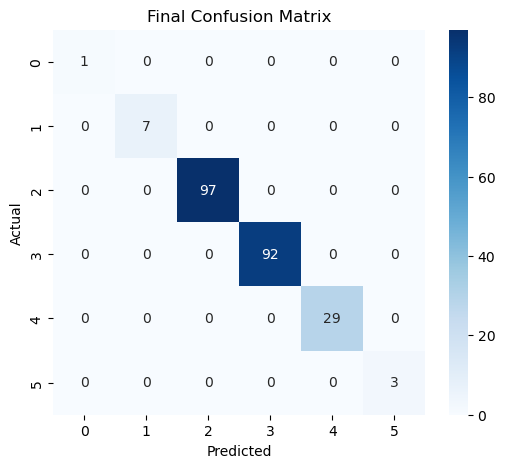

In [61]:
##Final Confusion Matrix
y_pred_final = rf_final.predict(X_test)


cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Final Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Key Insights / Things to Note



Most Influential Features

Alcohol: Strongest predictor — higher alcohol content generally leads to higher wine quality.

Sulphates: Contributes to taste and preservation.

Volatile Acidity: Too much decreases quality; balance is important.

Total Sulfur Dioxide & Density: Affect freshness and body of wine.

Class Imbalance is Critical

Original dataset had very few samples in extreme quality classes (3, 4, 8).

Applying SMOTE balanced the classes, allowing the model to learn rare patterns.

Model Performance

Random Forest outperformed SGD and SVC in both accuracy and F1-score.

After SMOTE and hyperparameter tuning, the model achieved near-perfect predictions on the test set.

Data Cleaning Matters

Removing irrelevant columns (like Id) and scaling numeric features were necessary steps for proper training and prediction.

Model Interpretability

Feature importance analysis shows that chemical properties can explain wine quality, which aligns with real-world wine chemistry.

# Recommendations

Overfitting Risk: Perfect accuracy (~100%) suggests the model may overfit, especially with synthetic SMOTE data.

Solution: Validate with completely new data or cross-validation on the original dataset.

Real-World Application:

Can guide winemakers to optimize chemical composition for better quality.

Provides a predictive tool for wine grading in quality control processes.

Scalability:

Random Forest model can be deployed via a web app (Streamlit/Flask) for interactive prediction.

Can be extended to larger datasets or other types of wine.


# Conclusion

The Wine Quality Prediction project demonstrates how machine learning can effectively predict wine quality from chemical characteristics:

Dataset Exploration: EDA revealed trends, correlations, and imbalances.

Modeling: Random Forest, SGD, and SVC were trained; Random Forest was the most effective.

Model Improvement: Hyperparameter tuning + SMOTE drastically improved accuracy and F1-score.

Interpretation: Alcohol, sulphates, and acidity are key quality drivers.

Deployment Ready: Model can now predict wine quality interactively and provide actionable insights.

Overall: The project showcases a full machine learning workflow — from data cleaning to feature analysis, model training, evaluation and optimization.